# Laboratorio 4

#### Mario de León 19029
#### Javier Valle 20159

In [1]:
# Descripción de los datos, preprocesamiento y sus explicaciones, unigramas, bigramas, modelo preliminar de predicción.

"""
    Datos:
    id: Identificador del Tweet.
    keword: una palabra clave del tweet, puede estar en blanco.
    location: la ubicación desde donde fue enviado el tweet.
    text: el texto del tweet.
    target: indica si se trata de un desastre real (1) o no (0). 
"""

'\n    Datos:\n    id: Identificador del Tweet.\n    keword: una palabra clave del tweet, puede estar en blanco.\n    location: la ubicación desde donde fue enviado el tweet.\n    text: el texto del tweet.\n    target: indica si se trata de un desastre real (1) o no (0). \n'

### Inciso 2: Cargar los datos.

#### Imports necesarios.

In [2]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams

In [3]:
# Cargar el dataset desde un archivo CSV
test = pd.read_csv('test.csv')

train = pd.read_csv("train.csv")

# Cargando las primeras 5 filas del dataset.
print("Test")
print(test.head())

print("Train")
print(test.head())

Test
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
Train
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
# Info del dataset.
print("Test")
print(test.info())

print("Train")
print(train.info())

Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


## Inciso 3: Limpie y preprocese los datos. Describa de forma detallada las activdades de preprocesamiento que llevó a cabo.

In [5]:
# Convertir el texto a mayúsculas o minúsculas.

# Convertiendo todas las columnas de texto a minúsculas del dataset test.
test = test.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

# Imprimiendo el DataFrame resultante
print(test)

# Convertiendo todas las columnas de texto a minúsculas del dataset train.
train = train.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

# Imprimiendo el DataFrame resultante
print(train)

         id keyword location  \
0         0     nan      nan   
1         2     nan      nan   
2         3     nan      nan   
3         9     nan      nan   
4        11     nan      nan   
...     ...     ...      ...   
3258  10861     nan      nan   
3259  10865     nan      nan   
3260  10868     nan      nan   
3261  10874     nan      nan   
3262  10875     nan      nan   

                                                   text  
0                    just happened a terrible car crash  
1     heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              apocalypse lighting. #spokane #wildfires  
4         typhoon soudelor kills 28 in china and taiwan  
...                                                 ...  
3258  earthquake safety los angeles ûò safety faste...  
3259  storm in ri worse than last hurricane. my city...  
3260  green line derailment in chicago http://t.co/u...  
3261  meg issues hazardous weather 

#### Quitando caracteres especiales.

In [6]:
# Función para limpiar los caracteres especiales
def clean_text(text):
    if isinstance(text, str):
        # Eliminar caracteres no alfanuméricos excepto espacios
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        return cleaned_text
    else:
        return text

# Aplicando la función a todas las columnas de texto del df train.
train = train.applymap(clean_text)

# Imprimir df resultante
print(train)

# Aplicando la función a todas las columnas de texto del df test
test = test.applymap(clean_text)

# Imprimir df resultante
print(test)

         id keyword location  \
0         1     nan      nan   
1         4     nan      nan   
2         5     nan      nan   
3         6     nan      nan   
4         7     nan      nan   
...     ...     ...      ...   
7608  10869     nan      nan   
7609  10870     nan      nan   
7610  10871     nan      nan   
7611  10872     nan      nan   
7612  10873     nan      nan   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                 forest fire near la ronge sask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary thetawniest the out of control wild...       1  
7610  m194 0104 utc5k

#### Describiendo los datos

In [7]:
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['keyword'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe()

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en la ubicación:", location_unique_count)

# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['text'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe()

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)

Estadísticas de longitud de textos:
 count    7613.000000
mean        8.533824
std         3.208316
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en la ubicación: 3129
Estadísticas de longitud de textos:
 count    7613.000000
mean       93.899251
std        31.709694
min         6.000000
25%        71.000000
50%        99.000000
75%       123.000000
max       143.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en base al texto: 3129


In [8]:
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
test['tweet_length'] = test['keyword'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe()

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = test['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en la ubicación:", location_unique_count)

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = test['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)

Estadísticas de longitud de textos:
 count    7613.000000
mean       93.899251
std        31.709694
min         6.000000
25%        71.000000
50%        99.000000
75%       123.000000
max       143.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en la ubicación: 1518
Estadísticas de longitud de textos:
 count    7613.000000
mean       93.899251
std        31.709694
min         6.000000
25%        71.000000
50%        99.000000
75%       123.000000
max       143.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en base al texto: 1518


#### Haciendo unigramas y bigramas.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


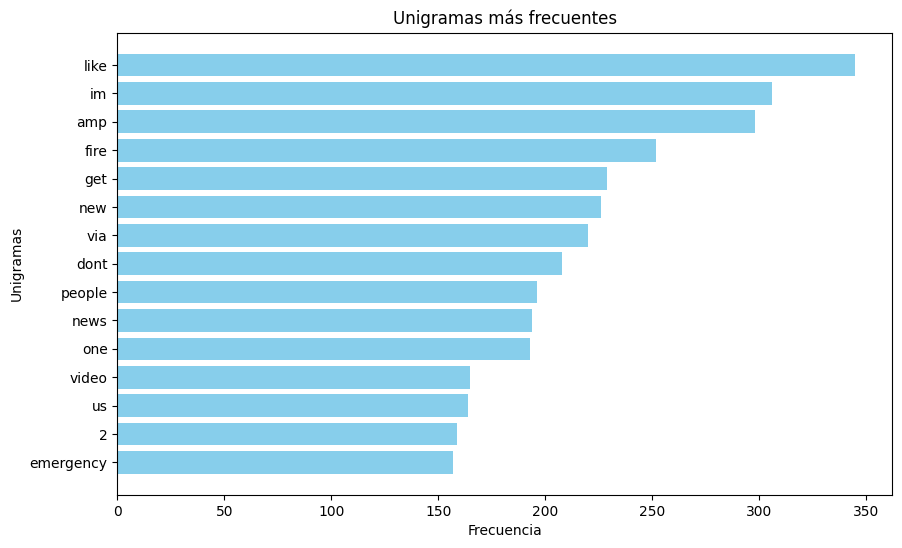

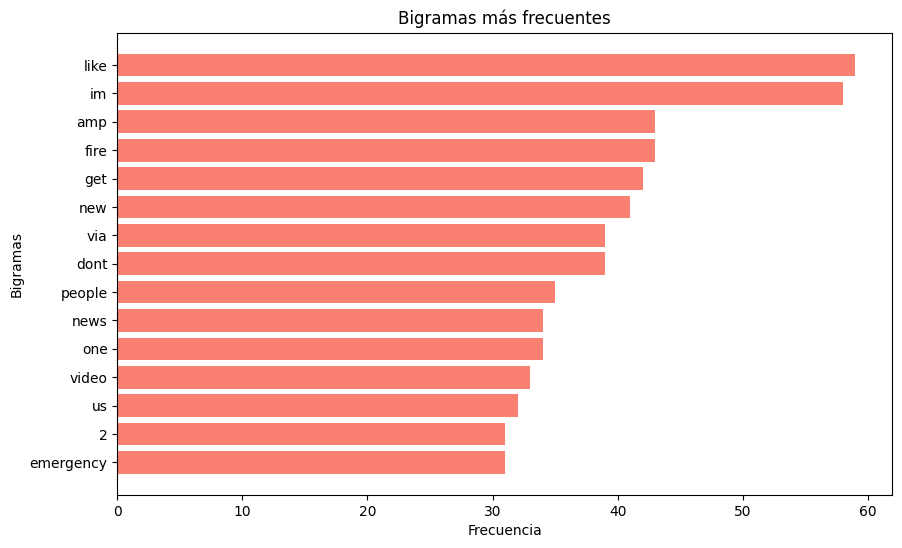

In [9]:
# Descargando recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Obteniendo una lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Unigramas y bigramas
all_unigrams = []
all_bigrams = []

for text in train['text']:
    # Haciendo tokenización de las palabras en el texto
    tokens = word_tokenize(text.lower())
    
    # Filtrando stopwords y puntuación
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    
    # Generando unigramas
    all_unigrams.extend(filtered_tokens)
    
    # Generando bigramas
    bi_grams = list(bigrams(filtered_tokens))
    all_bigrams.extend(bi_grams)

# Contando frecuencia de unigramas y bigramas
unigram_freq = Counter(all_unigrams)
bigram_freq = Counter(all_bigrams)

# Obteniendo los 10 unigramas y bigramas más frecuentes
top_unigrams = unigram_freq.most_common(15)
top_bigrams = bigram_freq.most_common(15)

# Separando los datos y las etiquetas para graficar
unigram_labels, unigram_counts = zip(*top_unigrams)
bigram_keywords, bigram_counts = zip(*top_bigrams)

# Graficando los unigramas más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(unigram_labels, unigram_counts, color='skyblue')
plt.xlabel('Frecuencia')  # Usar xlabel en lugar de xkeyword
plt.ylabel('Unigramas')  # Usar ylabel en lugar de ykeyword
plt.title('Unigramas más frecuentes')
plt.gca().invert_yaxis()  # Invertir el eje y para que los más frecuentes estén arriba
plt.show()


# Graficando los bigramas más frecuentes
plt.figure(figsize=(10, 6))

# Desempaquetando los pares de bigramas para etiquetas y valores separados
bigram_keywords = [f"{bg[0]} {bg[1]}" for bg in bigram_keywords]  
plt.barh(unigram_labels, bigram_counts, color='salmon')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.title('Bigramas más frecuentes')
plt.gca().invert_yaxis()  # Invertiendo el eje y para que los más frecuentes estén arriba
plt.show()


#### Creando un modelo preliminar de predicción.

C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Exactitud del modelo: 0.8614576493762311
Informe de clasificación:
                       precision    recall  f1-score   support

              ablaze       1.00      1.00      1.00         9
            accident       1.00      0.69      0.82        13
          aftershock       0.43      0.60      0.50         5
  airplane20accident       1.00      1.00      1.00         6
           ambulance       1.00      0.90      0.95        10
         annihilated       1.00      1.00      1.00         9
        annihilation       1.00      0.88      0.93         8
          apocalypse       0.67      0.67      0.67         3
          armageddon       1.00      0.90      0.95        10
                army       0.89      1.00      0.94         8
               arson       0.67      1.00      0.80         4
            arsonist       0.00      0.00      0.00         9
              attack       1.00      0.80      0.89        10
            attacked       0.92      1.00      0.96        11
 

AttributeError: module 'matplotlib.pyplot' has no attribute 'xkeyword'

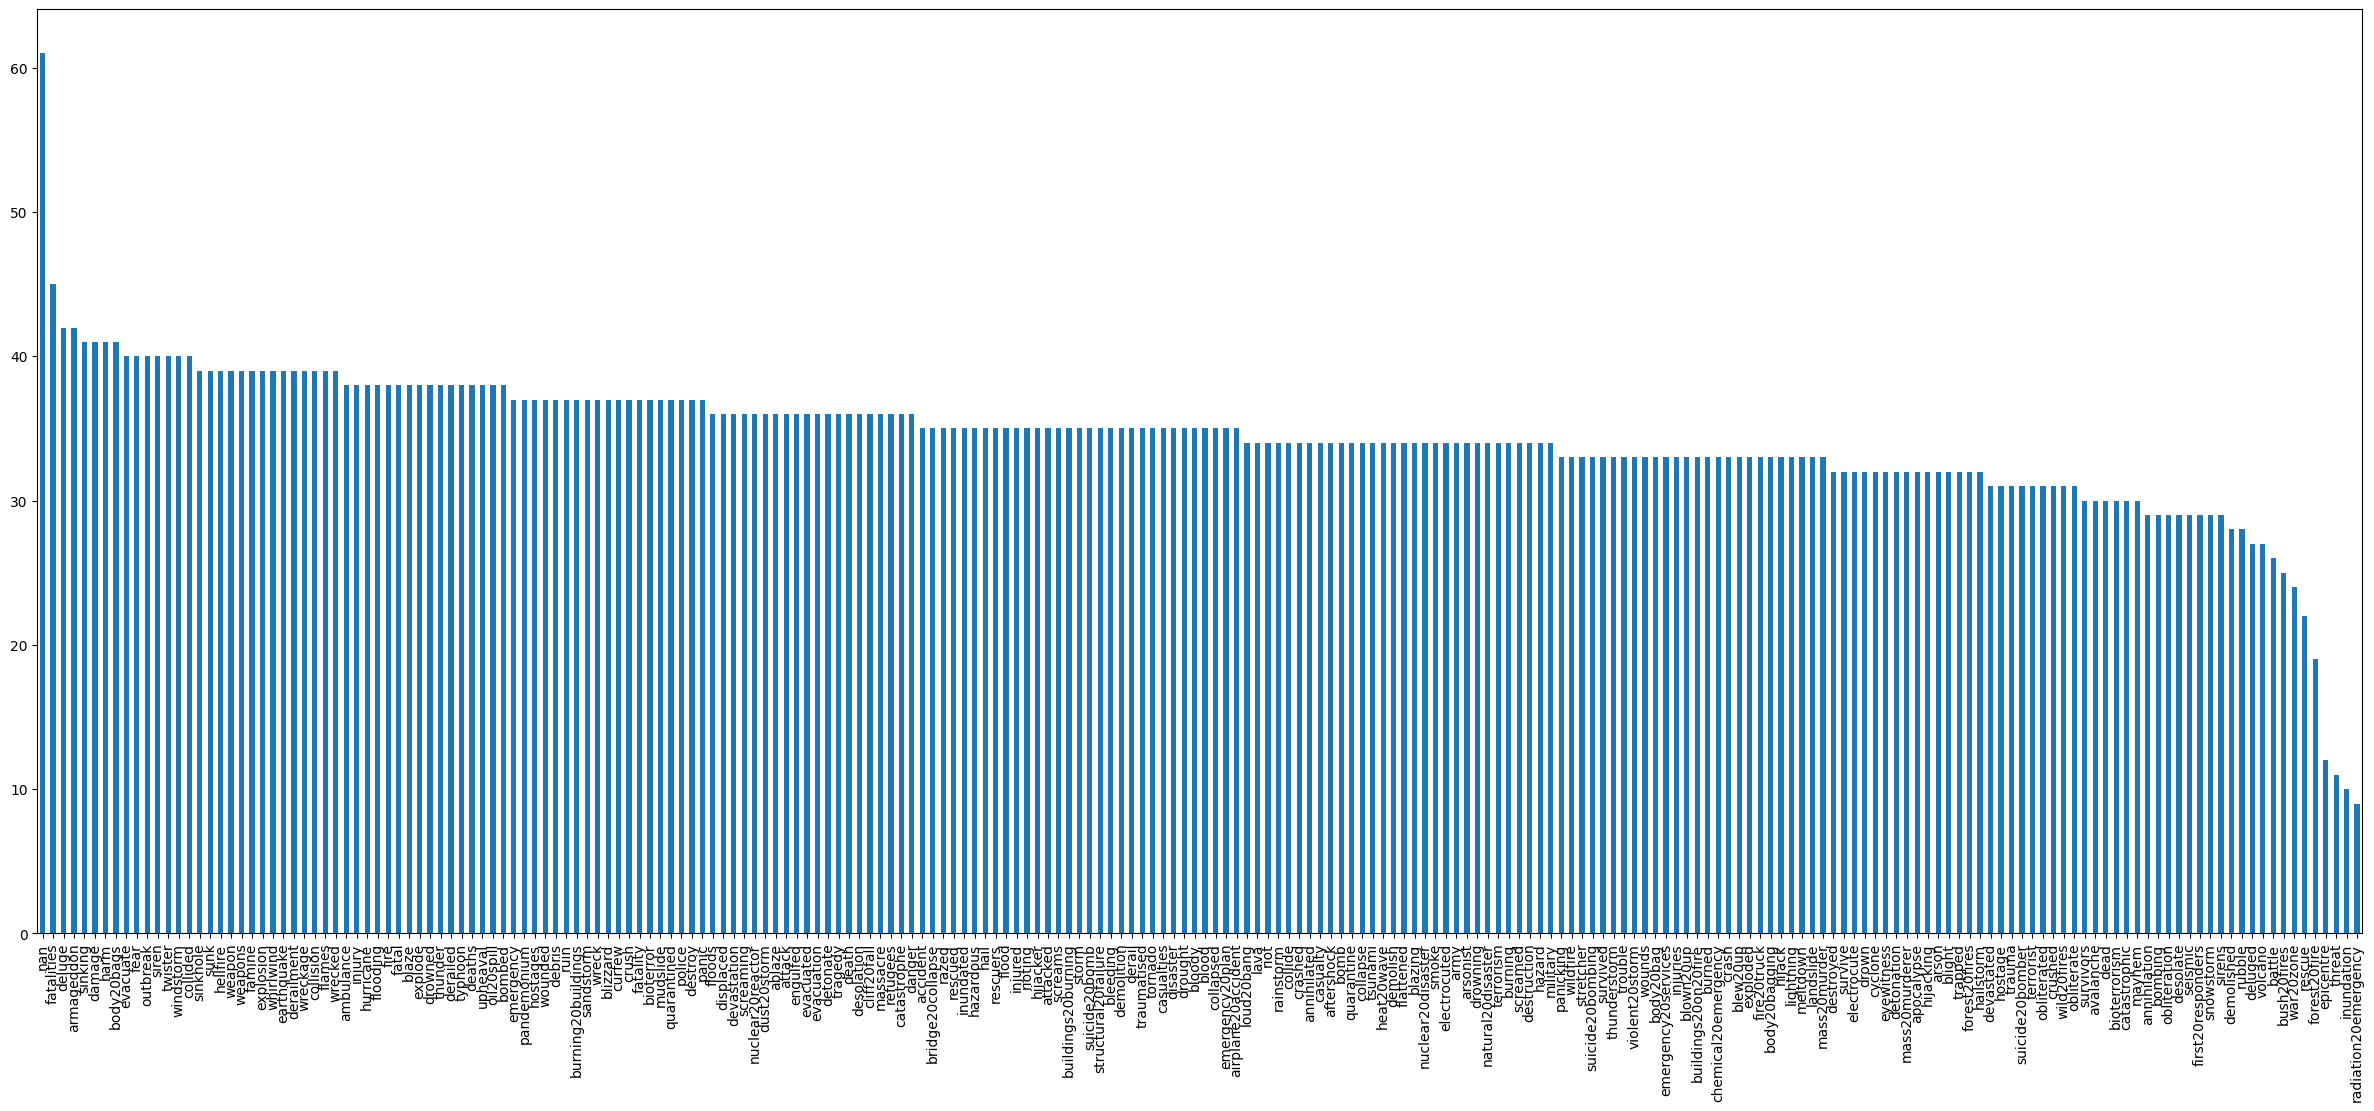

In [10]:
# Definiendo las características (X) y las etiquetas (y)
X = train['text']  # Usando la columna "text" como características
y = train['keyword']  # Usando la columna "keyword" como etiquetas

# Dividiendo el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizando el texto utilizando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Características
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Entrenando el modelo de Bosques Aleatorios
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vectorized, y_train)

# Predeciendo etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_vectorized)

# Evaluando el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("Informe de clasificación:\n", classification_rep)

# Visualizando la distribución de etiquetas categóricas
plt.figure(figsize=(30, 12))
keyword_counts = train['keyword'].value_counts()
keyword_counts.plot(kind='bar')
plt.xkeyword('Etiqueta')
plt.ykeyword('Cantidad')
plt.title('Distribución de etiquetas categóricas')
plt.xticks(rotation=90)
plt.show()

# Creando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando de la matriz de confusión utilizando seaborn
plt.figure(figsize=(30, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xkeyword('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

# Inciso 4: Frecuencia de palabras y análisis de bigramas y trigramas

In [11]:
disaster_tweets = train[train['target'] == 1]['text']
non_disaster_tweets = train[train['target'] == 0]['text']

stop_words = set(stopwords.words('english'))

def get_most_common_ngrams(tweets, n=1, num=10):
    all_ngrams = []
    for tweet in tweets:
        tokens = word_tokenize(tweet)
        filtered = [w for w in tokens if w.isalnum() and w.lower() not in stop_words]
        
        tweet_ngrams = list(ngrams(filtered, n))
        all_ngrams.extend(tweet_ngrams)
        
    return Counter(all_ngrams).most_common(num)

def print_ngrams(ngram_list, title):
    print(title)
    print('-' * len(title))
    for ngram, count in ngram_list:
        # Esto une los n-gramas y muestra el recuento
        print(f"{' '.join(ngram):<20} : {count}")
    print()

# Unigramas
top_disaster_words = get_most_common_ngrams(disaster_tweets, n=1, num=15)
top_non_disaster_words = get_most_common_ngrams(non_disaster_tweets, n=1, num=15)

print_ngrams(top_disaster_words, "Top disaster words")
print_ngrams(top_non_disaster_words, "Top non-disaster words")

# Bigramas
top_disaster_bigrams = get_most_common_ngrams(disaster_tweets, n=2, num=15)
top_non_disaster_bigrams = get_most_common_ngrams(non_disaster_tweets, n=2, num=15)

print_ngrams(top_disaster_bigrams, "Top disaster bigrams")
print_ngrams(top_non_disaster_bigrams, "Top non-disaster bigrams")

# Trigramas
top_disaster_trigrams = get_most_common_ngrams(disaster_tweets, n=3, num=15)
top_non_disaster_trigrams = get_most_common_ngrams(non_disaster_tweets, n=3, num=15)

print_ngrams(top_disaster_trigrams, "Top disaster trigrams")
print_ngrams(top_non_disaster_trigrams, "Top non-disaster trigrams")





Top disaster words
------------------
fire                 : 180
news                 : 136
via                  : 121
disaster             : 117
california           : 111
suicide              : 110
police               : 107
amp                  : 106
people               : 105
killed               : 93
like                 : 92
hiroshima            : 86
storm                : 85
crash                : 84
fires                : 84

Top non-disaster words
----------------------
like                 : 253
im                   : 248
amp                  : 192
new                  : 170
get                  : 163
dont                 : 154
one                  : 128
body                 : 113
via                  : 99
would                : 97
video                : 96
got                  : 91
people               : 91
love                 : 90
cant                 : 86

Top disaster bigrams
--------------------
suicide bomber       : 59
northern california  : 41
oil spill            : 

### ¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?

### Palabras para un mejor modelo de clasificación:

Para los tweets de desastres:

Palabras como "fire", "disaster", "suicide", "police", "killed", "hiroshima", "storm", y "crash" son indicadores fuertes de eventos de desastre.

Para los tweets que no son de desastres:

Palabras como "like", "im", "new", "get", "dont", y "love" son más casuales y no están directamente relacionadas con desastres.

Sin embargo, varias palabras como "amp", "via" y "personas" se pueden encontrar en ambas listas. Estos términos no serían muy útiles para distinguir entre los dos tipos de tweets porque son comunes en ambos contextos.

### ¿Vale la pena explorar bigramas o trigramas para analizar contexto?

Si, ya que los bigramas y trigramas ofrecen un contexto más profundo que los unigramas. Los bigramas y trigramas proporcionan más contexto que las palabras individuales. Si bien las palabras aisladas pueden ser ambiguas por sí solas, agregar más palabras puede aclarar el significado. Por ejemplo, "fire" puede ser vago, pero "california wildfire" es definitivamente un desastre.

El uso de bigramas y trigramas en el modelo puede ayudar a mejorar su precisión, pero también puede aumentar la complejidad del modelo y el tiempo de entrenamiento. Por lo tanto, se debe hacer un equilibrio entre precisión y eficiencia. 

# 5. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis 5.1.

### Nube de palabras

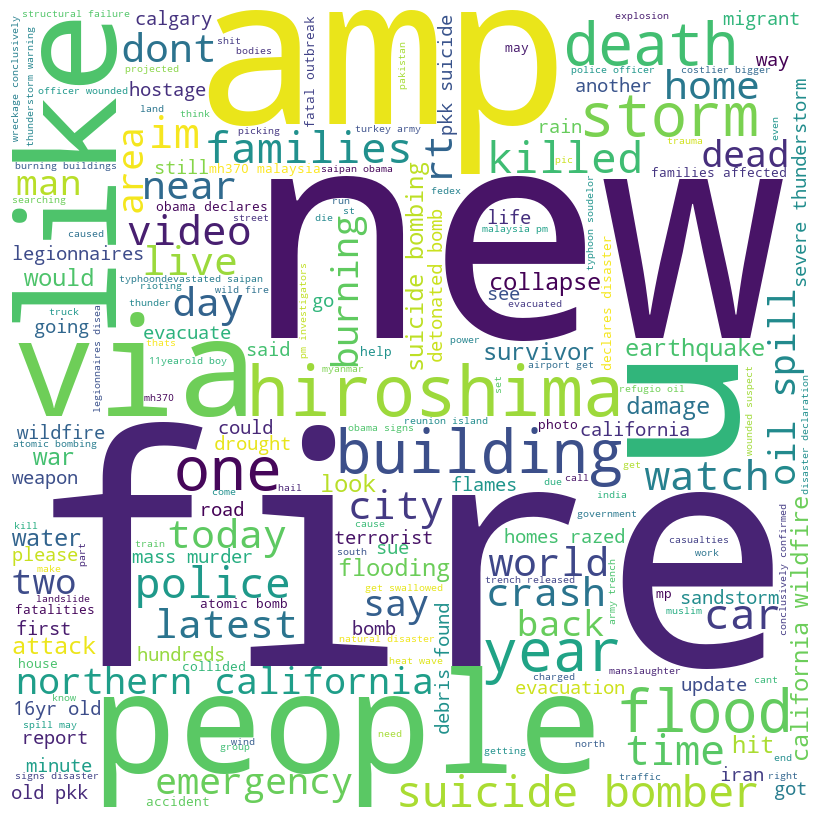

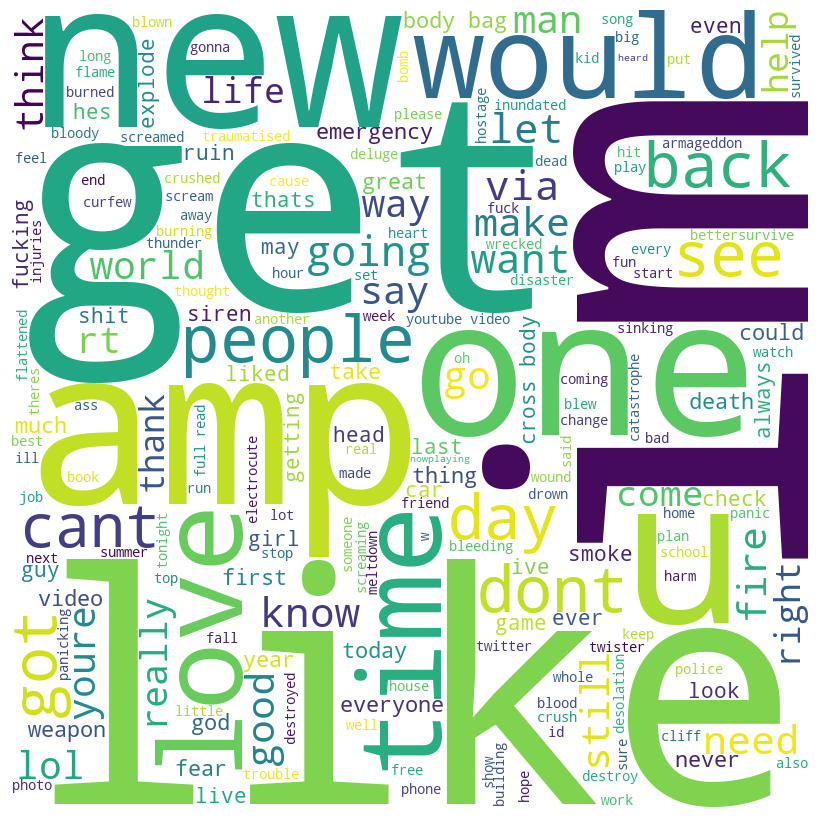

In [12]:
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = stop_words,
                          min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

# Generar una nube de palabras para tweets de desastres
generate_wordcloud(' '.join(disaster_tweets))

# Generar una nube de palabras para tweets que no son de desastres
generate_wordcloud(' '.join(non_disaster_tweets))

### Hacer un histograma con las palabras que más se repiten

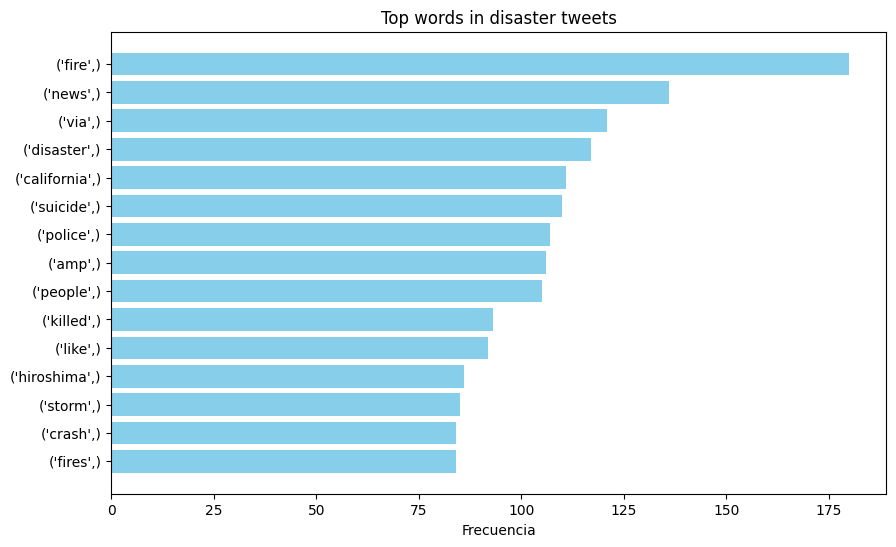

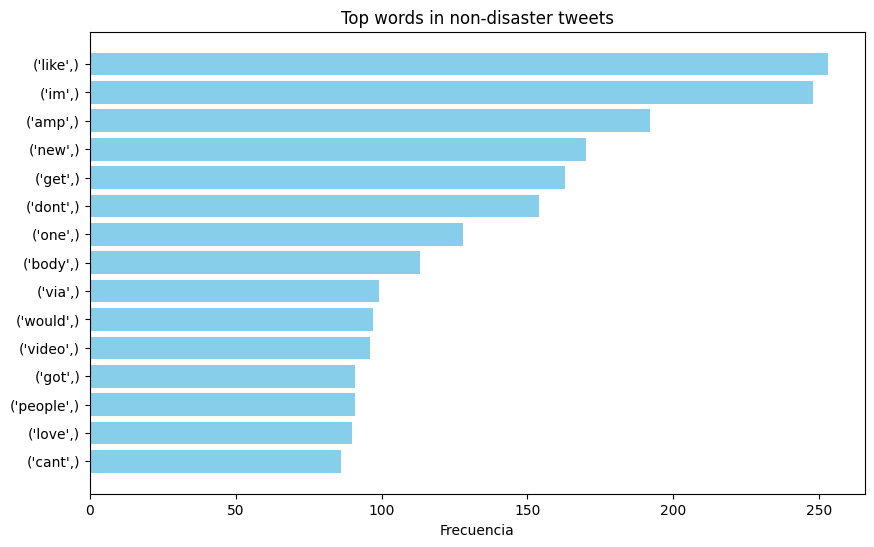

In [13]:
def plot_top_words(word_list, title):
    words, counts = zip(*word_list)
    words = [str(word) for word in words]
    counts = [int(count) for count in counts]
    
    plt.figure(figsize=(10,6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Graficar histograma para tweets de desastres
plot_top_words(top_disaster_words, 'Top words in disaster tweets')

# Graficar histograma para tweets que no son de desastres
plot_top_words(top_non_disaster_words, 'Top words in non-disaster tweets')

### Discusión sobre las palabras que tienen presencia en todas las categorías

Palabras como "amp", "vía" y "personas" se utilizan con frecuencia en ambas categorías, como mencionamos anteriormente. Dado que son comunes en ambos contextos, estas palabras no tienen mucho valor discriminativo. Por lo tanto, sería beneficioso tener en cuenta estas palabras como palabras vacías o stopwords adicionales o darles menos peso al crear un modelo de clasificación.

# 6. Elabore una función en la que el usuario ingrese un tweet y el sistema lo clasifique en desastre o no.

In [14]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['target'], test_size=0.2, random_state=42)

# Vectorización usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

# Entrenar un modelo de regresión logística
clf = LogisticRegression()
clf.fit(X_train_tf, y_train)

# Evaluar precisión en el conjunto de prueba
accuracy = clf.score(X_test_tf, y_test)
print(f'Accuracy: {accuracy:.2f}')

def classify_tweet(tweet):
    tweet_tf = vectorizer.transform([tweet])
    prediction = clf.predict(tweet_tf)
    return "Desastre" if prediction[0] == 1 else "No Desastre"

# Tweet de prueba
tweet_de_prueba = "There was a massive earthquake in San Francisco today."

# Clasificación
result = classify_tweet(tweet_de_prueba)
print(f"El tweet '{tweet_de_prueba}' es clasificado como: {result}")

Accuracy: 0.80
El tweet 'There was a massive earthquake in San Francisco today.' es clasificado como: Desastre
